In [7]:
import import_ipynb
from AE_LIB import*

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

importing Jupyter notebook from AE_LIB.ipynb


2023-09-15 18:28:19.364949: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-15 18:28:20.107535: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 1) Choose one model

#####   1) MULTI COLUMNS

In [2]:
# Autoencoder Model that looks at all colums, using CONVOLUTIONAL INITIAL LAYERS
def AutoEncoder(input_shape,loss_type="mse",dropout_rate=None,learning_rate=0.001):#input_shape[1]= window_size input_shape[2]=number of features
    if input_shape[2]%2==0:
        hidden_features_layer=input_shape[2]/2
    else:
        hidden_features_layer=int(input_shape[2]/2)+1
        
    # Encoder
    inputs = Input(shape=(input_shape[1:]))
    x = Conv1D(input_shape[2], 3, activation='relu', padding='same')(inputs)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(hidden_features_layer, 3, activation='relu', padding='same')(x)
    if type(dropout_rate) in [int,float]:
        x=Dropout(dropout_rate)(x)
    encoded = MaxPooling1D(2, padding='same')(x)
    
    
    # Decoder
    x = Conv1D(hidden_features_layer, 3, activation='relu', padding='same')(encoded)
    x = UpSampling1D(2)(x)
    x = Conv1D(input_shape[2], 3, activation='relu', padding='same')(x)
    if type(dropout_rate) in [int,float]:
        x=Dropout(dropout_rate)(x)
    x = UpSampling1D(2)(x)
    decoded = Dense(input_shape[2], activation='linear')(x)
    
        
    # Autoencoder model
    model = Model(inputs, decoded)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss=loss_type)
    model.summary()
    
    model_input_shape=input_shape
    author="kia"
    layers_type="convolutional"
    
    return model,model_input_shape,author,layers_type

In [ ]:
# Autoencoder model taht uses dense, fully connected layers on multiple columns
def AutoEncoder(input_shape,loss_type="mse",dropout_rate=None,learning_rate=0.001):#input_shape[1]= window_size input_shape[2]=number of features
    hidden_layer1=int((input_shape[2])/1.25)
    hidden_layer2=int((input_shape[2])/(1.25**2))
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(input_shape[1],input_shape[2])))
    model.add(tf.keras.layers.Dense(input_shape[2],activation="relu"))
    if type(dropout_rate) in [int,float]:
        model.add(Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(hidden_layer1,activation="relu"))
    model.add(tf.keras.layers.Dense(hidden_layer2,activation="relu"))
    model.add(tf.keras.layers.Dense(hidden_layer1,activation="relu"))
    if type(dropout_rate) in [int,float]:
        model.add(Dropout(dropout_rate))           
    model.add(TimeDistributed(Dense(input_shape[2],activation="linear")))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss=loss_type)
    model.summary()
    
    
    model_input_shape=input_shape
    author="erhun"
    layers_type="dense"
    
    return model,model_input_shape,author,layers_type

##### 2) SINGLE COLUMNS

In [ ]:
#Autoencoder model that gets a single column of the data and outputs a single column. DENSE LAYERS
def AutoEncoder(input_shape,loss_type="mse",dropout_rate=None,learning_rate=0.001):#input_shape[1]= window_size input_shape[2]=number of features

    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(input_shape[1])))
    model.add(tf.keras.layers.Dense(input_shape[1],activation="relu"))
    model.add(tf.keras.layers.Dense(64,activation="relu"))
    model.add(tf.keras.layers.Dense(32,activation="relu"))
    if type(dropout_rate) in [int,float]:
        model.add(Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(16,activation="relu"))
    model.add(tf.keras.layers.Dense(8,activation="relu"))
    model.add(tf.keras.layers.Dense(16,activation="relu"))
    if type(dropout_rate) in [int,float]:
        model.add(Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(32,activation="relu"))
    model.add(tf.keras.layers.Dense(64,activation="relu"))
    model.add(Dense(input_shape[1],activation="linear"))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss=loss_type)
    model.summary()
    
    
    model_input_shape=input_shape[:-1]
    author="erhun"
    layers_type="dense"
    
    return model,model_input_shape,author,layers_type

In [ ]:
#Autoencoder model that gets a single column of the data and outputs a single column. CONVLTURIONAL LAYERS

def AutoEncoder(input_shape,loss_type="mse",dropout_rate=None,learning_rate=0.001):#input_shape[1]= window_size input_shape[2]=number of features

    model = tf.keras.models.Sequential()
    model.add(layers.Input(shape=(input_shape[1], 1)))
    model.add(layers.Conv1D(filters=32, kernel_size=5, padding="same", strides=2, activation="relu"))
    if type(dropout_rate) in [int,float]:
        model.add(Dropout(dropout_rate))
    model.add(layers.Conv1D(filters=16, kernel_size=3, padding="same", strides=2, activation="relu"))
    model.add(UpSampling1D(2))
    if type(dropout_rate) in [int,float]:
        model.add(Dropout(dropout_rate))
    model.add(UpSampling1D(2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, padding="same", strides=1, activation="relu"))
    model.add(layers.Conv1D(filters=1, kernel_size=5, padding="same", strides=1, activation="linear"))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss=loss_type)
    model.summary()
    
    model_input_shape=input_shape
    author="erhun"
    layers_type="convolutional"
    
    return model,model_input_shape,author,layers_type

# 2) Choose Train Paths

### 2.1) ALL PATHS, TRAIN COLUMNS AND TIME COLUMN

##### 2.1.1) ALL XDK PATHS  

In [ ]:
# LIST OF ALL PATHS FOR NUROL LOBSTER DATA
# COPY PASTE FROM HERE AS NEEDED

read_paths=["s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct1/pump-1/{}/{}/{}/",
            "s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct1/pump-2/{}/{}/{}/",
            "s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct1/redressor-2{}/{}/{}/",
        
            "s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/pump-1/{}/{}/{}/",
            "s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/pump-2/{}/{}/{}/",
            "s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/redressor-1-1/{}/{}/{}/",
            "s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/redressor-1-2/{}/{}/{}/",
            "s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/redressor-1-3/{}/{}/{}/",
        
            "s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct3/pump-1{}/{}/{}/",
            "s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct3/pump-2/{}/{}/{}/",
            "s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct3/redressor-1/{}/{}/{}/",
            "s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct3/redressor-2/{}/{}/{}/",
            "s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct3/redressor-3/{}/{}/{}/",
       
           #"s3://tm-partitioned/preprocessed/nurol/tr/golbasi/komage/motor/{}/{}/{}/",
           #"s3://tm-partitioned/preprocessed/nurol/tr/golbasi/komage/top/{}/{}/{}/",
            
            
            #"s3://data-science-source/Anomaly_detection/Autoencoder/gt_files/nurol/tr/golbasi/fct2/all/gt/id/{}/{}/{}/"
            ]


# LIST OF LOBSTER PATSH FOR KUTAHYA
read_paths=[
"s3://tm-partitioned/preprocessed/kutahya-ser/tr/15temmuz/line-2/sirlama/{}/{}/{}/",
"s3://tm-partitioned/preprocessed/kutahya-ser/tr/15temmuz/line-2/dijital/{}/{}/{}/",
"s3://tm-partitioned/preprocessed/kutahya-ser/tr/15temmuz/line-3/sirlama/{}/{}/{}/",
    ]

# LIST OF SOME OTHER LOBSTER PATHS
read_paths=[
    "s3://tm-partitioned/preprocessed/kutahya-ser/tr/15temmuz/line-6/sirlama/{}/{}/{}/",
    "s3://tm-partitioned/preprocessed/kutahya-ser/tr/15temmuz/line-6/pres/{}/{}/{}/",
    "s3://tm-partitioned/preprocessed/kutahya-ser/tr/15temmuz/line-3/dijital/{}/{}/{}/",
    "s3://tm-partitioned/preprocessed/kutahya-ser/tr/15temmuz/line-3/pres/{}/{}/{}/",   
    "s3://tm-partitioned/preprocessed/kutahya-ser/tr/15temmuz/line-2/pres/{}/{}/{}/",            
    ]


# LIST OF CELIK HALAT PATHS
read_paths=[
            "s3://tm-partitioned/preprocessed/celik-halat/tr/kartepe/m432/sanziman-ana/{}/{}/{}/",
            "s3://tm-partitioned/preprocessed/celik-halat/tr/kartepe/m432/sanziman-tambur/{}/{}/{}/",
            "s3://tm-partitioned/preprocessed/celik-halat/tr/kartepe/m424/verici/{}/{}/{}/"
            ]


time_column="tm"
all_train_cols_list=[
    ['ax', 'ay', 'az','a_rms_eff','mx', 'my', 'mz','mr', 'm_rms','t', 'p', 'n','a_fft_0_f','n_fft_0_f',"a_fft_1_f_clean","n_fft_1_f_clean"]
]



##### 2.1.2) ALL GT PATHS  

In [ ]:
# GROUND TRUTH PATH FOR NUROL    (EVERY PROJECT NEEDS A CELL LIKE THIS!)
read_paths=["s3://ml-labels/gt-preprocessed/nurol/tr/golbasi/fct2/all/{}/{}/{}/"]
time_column='Cur. Time Charge'

#ADD THE THERMOCOUPLE
all_train_cols=list(pd.read_parquet("s3://test-data-eng/anomaly_detection/autoencoder/sources/our_own_doing/train_cols/FCT2_gt_train_columns.parquet").values.ravel())+['ISO TC zones abs diff [°C]']
#DESIRED GROUND TRUTH COLUMNS CONTAINED ABOVE


#REMOVE UNWANTED COLUMNS
all_train_cols.remove('Wika abs. box [mbar]')
all_train_cols.remove('Wika abs. vessel [mbar]')  ################# old dates dont have this two column

all_train_cols.remove('AV tube heater [°C]')
all_train_cols.remove('SV tube heater [°C]')
all_train_cols.remove('TPC temperature [°C]')
all_train_cols.remove('Y relative pressure [%]')
all_train_cols.remove('SV relative pressure [mbar(g)]')
all_train_cols.remove('TPC secondary air 1 [%]')
all_train_cols.remove('TPC secondary air 2 [%]',)
all_train_cols.remove( 'TPC secondary air 3 [%]')

all_train_cols_list=[all_train_cols]



In [ ]:
# explore what we are getting
all_train_cols_list

##### 2.1.3) ALL GT STATİSTİCAL INPUT PATHS  

In [ ]:
#STATISTICALIZED DATA OF NUROL   (KULLANILMADI PEK) ( TALHADAN MAKBUL OLANLARI GELECEK)
read_paths=["s3://test-data-eng/anomaly_detection/autoencoder/inputs/statistical_funcs_byMinute/nurol/tr/golbasi/fct2/all/gt/all/{}/{}/{}/"]
all_train_cols=list(pd.read_parquet("s3://test-data-eng/anomaly_detection/autoencoder/sources/our_own_doing/train_cols/FCT2_gt_train_columns.parquet").values.ravel())+['ISO TC zones abs diff [°C]']
all_train_cols.remove('Wika abs. box [mbar]')
all_train_cols.remove('Wika abs. vessel [mbar]')  ################# old dates dont have this two column
all_train_cols.remove('TPC secondary air 1 [%]')
all_train_cols.remove('TPC secondary air 2 [%]',)
all_train_cols.remove( 'TPC secondary air 3 [%]')
time_column='Cur. Time Charge_minute'


#TRANSFORM TIME SERIES DATA TO STATISCIAL DATA
statiscital_func_list=["sum","mean","median","std","min","max","maxMinDifference"]
statistical_all_train_cols=[]
for i in range(len(all_train_cols)):
    for j in range(len(statiscital_func_list)):
        statistical_all_train_cols.append("_".join([all_train_cols[i], statiscital_func_list[j]]))
all_train_cols=statistical_all_train_cols

all_train_cols_list=[all_train_cols]


# 2.2) CHOOSE ONE time_column, read_paths and all_train_cols_list

In [ ]:
#NUROL ALL COLUMNS LIST (USED FOR COPY PASTE)
# 4 lists of columns, will eventually train 4 different models
time_column='Cur. Time Charge'
read_paths=["s3://ml-labels/gt-preprocessed/nurol/tr/golbasi/fct2/all/{}/{}/{}/"]


all_train_cols_list=[
[
 'Power zone 1 - phase 1 [kW]',
 'Power zone 1 - phase 2 [kW]',
 'Power zone 1 - phase 3 [kW]',
 'Power zone 2 - phase 1 [kW]',
 'Power zone 2 - phase 2 [kW]',
 'Power zone 2 - phase 3 [kW]'],
['Voltage zone 1 - phase 1 [V]',
 'Voltage zone 1 - phase 2 [V]',
 'Voltage zone 1 - phase 3 [V]',
 'Voltage zone 2 - phase 1 [V]',
 'Voltage zone 2 - phase 2 [V]',
 'Voltage zone 2 - phase 3 [V]'],
['Current zone 1 - phase 1 [kA]',
 'Current zone 1 - phase 2 [kA]',
 'Current zone 1 - phase 3 [kA]',
 'Current zone 2 - phase 1 [kA]',
 'Current zone 2 - phase 2 [kA]',
 'Current zone 2 - phase 3 [kA]'],
 ['Resistance zone 1 - phase 1 [mOhm]',
 'Resistance zone 1 - phase 2 [mOhm]',
 'Resistance zone 1 - phase 3 [mOhm]',
 'Resistance zone 2 - phase 1 [mOhm]',
 'Resistance zone 2 - phase 2 [mOhm]',
 'Resistance zone 2 - phase 3 [mOhm]']]  


all_train_cols_list = [

  ['Ctrl. pyro zone 1 [°C]',
  'Ctrl. pyro zone 2 [°C]'],
    
  ['Sliding TC [°C]',
  'ISO TC 1 [°C]',
  'ISO TC 2 [°C]',
   'ISO TC zones abs diff [°C]'],
    
    
  [
  'Y Heizer Zone 2 [%]',
   'Y Heizer Zone 1 [%]'],
  
['SV temperature zone 2 [°C]',
 'SV temperature zone 1 [°C]',
  ],
    
 [   
  'Rapid cooling inlet temp. [°C]',
  'Rapid cooling outlet temp. [°C]',
  'Rapid cooling post CP1 temp. [°C]',
  'Speed rapid cooling pump [rpm]',
  'CW inlet temperature [°C]',
  'CW inlet conductance [µS/cm]',
  'Rapid cooling pressure inlet [mbar(g)]',
  'Rapid cooling pressure outlet [mbar(g)]',
  'Rapid cooling pressure deviation [mbar(g)]',
  'Current pump rapid cooling [A]',
  'Power pump rapid cooling [kW]',
  'Engine torque pump rapid cooling [nm]',
 ],
    
  [  
  'Relative pressure 1 [mbar(g)]',
  'Relative pressure 2 [mbar(g)]',
  'Absolute pressure 1 vessel [mbar(a)]',
  'Absolute pressure 2 box [mbar(a)]',
  'SV absolute pressure [mbar(a)]',
  'Y absolute pressure [%]',
  'Speed vacuum pump WAU [rpm]'],
    
    
  ['Power zone 1 [kW]',
  'Power zone 2 [kW]',
  'Power zone 1+2 [kW]',
  'Power zone 1 - phase 1 [kW]',
  'Power zone 1 - phase 2 [kW]',
  'Power zone 1 - phase 3 [kW]',
  'Power zone 2 - phase 1 [kW]',
  'Power zone 2 - phase 2 [kW]',
  'Power zone 2 - phase 3 [kW]',
  'Voltage zone 1 - phase 1 [V]',
  'Voltage zone 1 - phase 2 [V]',
  'Voltage zone 1 - phase 3 [V]',
  'Voltage zone 2 - phase 1 [V]',
  'Voltage zone 2 - phase 2 [V]',
  'Voltage zone 2 - phase 3 [V]',
  'Current zone 1 - phase 1 [kA]',
  'Current zone 1 - phase 2 [kA]',
  'Current zone 1 - phase 3 [kA]',
  'Current zone 2 - phase 1 [kA]',
  'Current zone 2 - phase 2 [kA]',
  'Current zone 2 - phase 3 [kA]',
  'Resistance zone 1 - phase 1 [mOhm]',
  'Resistance zone 1 - phase 2 [mOhm]',
  'Resistance zone 1 - phase 3 [mOhm]',
  'Resistance zone 2 - phase 1 [mOhm]',
  'Resistance zone 2 - phase 2 [mOhm]',
  'Resistance zone 2 - phase 3 [mOhm]'],
    
    [
'Power zone 1 - phase 1 [kW]',
 'Power zone 1 - phase 2 [kW]',
 'Power zone 1 - phase 3 [kW]',
 'Power zone 2 - phase 1 [kW]',
 'Power zone 2 - phase 2 [kW]',
 'Power zone 2 - phase 3 [kW]'],
['Voltage zone 1 - phase 1 [V]',
 'Voltage zone 1 - phase 2 [V]',
 'Voltage zone 1 - phase 3 [V]',
 'Voltage zone 2 - phase 1 [V]',
 'Voltage zone 2 - phase 2 [V]',
 'Voltage zone 2 - phase 3 [V]'],
['Current zone 1 - phase 1 [kA]',
 'Current zone 1 - phase 2 [kA]',
 'Current zone 1 - phase 3 [kA]',
 'Current zone 2 - phase 1 [kA]',
 'Current zone 2 - phase 2 [kA]',
 'Current zone 2 - phase 3 [kA]'],
 ['Resistance zone 1 - phase 1 [mOhm]',
 'Resistance zone 1 - phase 2 [mOhm]',
 'Resistance zone 1 - phase 3 [mOhm]',
 'Resistance zone 2 - phase 1 [mOhm]',
 'Resistance zone 2 - phase 2 [mOhm]',
 'Resistance zone 2 - phase 3 [mOhm]']
     
]


In [4]:
# LIST OF XDK PATHS FOR TRAINING NUROL  (THIS CELL COPIES THE VALUES TO THE VARIABLES)
read_paths=["s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/redressor-1-1/{}/{}/{}/",
            "s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/redressor-1-2/{}/{}/{}/",
            "s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/redressor-1-3/{}/{}/{}/",
            "s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/pump-1/{}/{}/{}/",
            "s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/pump-2/{}/{}/{}/",

            ]

time_column="tm"
all_train_cols_list=[
    ['ax', 'ay', 'az','a_rms_eff'],
    ['mx', 'my', 'mz','m_rms'],
    ['gx','gy','gz','g_rms']
                    ]

# 3) Choose Process Train Intervals

### 3.1) option 1 - USE START AND STOP TIMES FROM CUSTOMER CSV'S. USING TIME AND QUALITY EXTRACTOR NOTEBOOK

In [9]:
# GET THE TRAINING DATA
train_data_info=pd.read_parquet("s3://test-data-eng/anomaly_detection/autoencoder/sources/preprocessed/nurol/tr/golbasi/fct2/train_data_info/train_data_info_nurol_fct2_by_time_and_quality_extractor.parquet") 
# THE FILE ABOVE IS GENERATED AUTOMATICALLY!! IN THE NOTEBOOK:
# Fct Fırın Kalite_Kabul_Proje.ipynb ->  Fct_cycle_time_and_quality_extractor.ipynb
# RUN THE NOTEBOOK BELOW TO UPDATE THE DATA, IF IT WORKS THEN THE FOLLOWING CODE MAY NOT BE NEEDED


# /home/ec2-user/SageMaker/anomaly_detection/autoencoder/other_function_notebooks/fct_cycle_time_and_quality_extractor.ipynb



# MANUALLY ADD START STOP DATES FOR DATA THAT HAS NOT BEEN PROVIDED BY THE MACHINE (FAMOUS CSV FILES)
train_data_info.loc[295]=[pd.to_datetime('2023-02-21 02:23:06'),pd.to_datetime('2023-02-23 01:32:04'),None,10.0,None,None,None,2023]
train_data_info.loc[296]=[pd.to_datetime('2023-03-17 19:20:47'),pd.to_datetime('2023-03-19 17:43:27'),None,11.0,None,None,None,2023]
train_data_info.loc[297]=[pd.to_datetime('2023-03-23 14:43:00'),pd.to_datetime('2023-03-25 14:31:52'),None,12.0,None,None,None,2023]
train_data_info.loc[298,["start","end","cycle_num","year"]]=[pd.to_datetime("14.03.2023  22:36:59",dayfirst=True),pd.to_datetime("16.03.2023  23:22:19",dayfirst=True),13.0,2023]
train_data_info.loc[299,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-05-06 01:21:54"),pd.to_datetime("2023-05-08 08:59:47"),14.0,2023]
train_data_info.loc[300,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-05-10 04:54:32"),pd.to_datetime("2023-05-12 15:32:16"),15.0,2023]
train_data_info.loc[301,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-05-17 16:31:05"),pd.to_datetime("2023-05-19 11:23:51"),16.0,2023]
train_data_info.loc[302,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-06-03 01:10:57"),pd.to_datetime("2023-06-05 01:02:45"),17.0,2023]
train_data_info.loc[303,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-06-16 15:23:42"),pd.to_datetime("2023-06-18 20:56:39"),18.0,2023]
train_data_info.loc[304,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-06-19 16:41:40"),pd.to_datetime("2023-06-21 18:43:58"),19.0,2023]
train_data_info.loc[305,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-07-02 16:58:52"),pd.to_datetime("2023-07-04 18:06:57"),20.0,2023]
#BURALAR TAM EZIYET!


# CONVERT THE CYCLE NUMBER TO INT (NEEDED FOR EDA's VISUALIZATION ALGORITHMS)
train_data_info["cycle_num"]=train_data_info["cycle_num"].astype(int)


train_data_info=train_data_info.iloc[250:297] # SELECT THE CYCLES FOR TRAINING #EN TAZE DATALARDAN #AFTER REISISTANCE CHANGE
train_data_info
# ONLY THE START AND END ARE USED FOR TRAINING

,start,end,project,cycle_num,error_rate_total,error_rate_quality_gate_1,error_rate_quality_gate_2,year
250,2022-08-02 16:00:00,2022-08-05 00:00:00,agena,78,0.156566,0.083333,0.079890,2022.0
251,2022-08-05 11:30:00,2022-08-07 18:20:00,agena,79,0.055556,0.022727,0.033592,2022.0
252,2022-08-08 10:50:00,2022-08-10 17:30:00,agena,80,0.230769,0.107143,0.138462,2022.0
253,2022-08-11 13:17:00,2022-08-13 20:00:00,agena,81,0.179293,0.116162,0.071429,2022.0
254,2022-08-13 21:10:00,2022-08-16 02:30:00,agena,82,0.161616,0.073232,0.095368,2022.0
...,...,...,...,...,...,...,...,...
292,2023-02-11 00:49:20,2023-02-13 03:19:34,None,7,NaN,NaN,NaN,2023.0
293,2023-02-14 17:47:41,2023-02-16 20:36:35,None,8,NaN,NaN,NaN,2023.0
294,2023-02-17 17:47:13,2023-02-19 21:01:46,None,9,NaN,NaN,NaN,2023.0
295,2023-02-21 02:23:06,2023-02-23 01:32:04,None,10,NaN,NaN,NaN,2023.0


### 3.2) option 2 - USE START AND STOP DATES USING THE TECHNOLOGICAL STEP DATA IN THE CSV FILES - fct_extract_cycles_time_from_gt_tech_step.ipynb notebook 

In [10]:
# THE PARQUET FILE CONTAINS FILTERED DATA, CYCLES MUST BE OF A SPCIFIC LENTH etc...

train_data_info=pd.read_parquet("s3://test-data-eng/anomaly_detection/autoencoder/sources/preprocessed/nurol/tr/golbasi/fct2/train_data_info/train_data_info_nurol_{}_by_gt_tech_step.parquet".format("fct2"))
train_data_info=train_data_info[263:270]     # use this code to specify training cycles
train_data_info
# ONLY THE START AND END ARE USED FOR TRAINING


# IF THE DATASETS ARE DIFFERENT, CHECK FOR AVAILABILITY OF DATA ON THE OTHER DATASET, I.E. For nurol, cycles may exist on the csv files, but may not exist for lobster data.

,start,end,gtId,endPhase,process_id,year
263,2023-03-14 22:36:59,2023-03-16 23:22:19,721,Cooling,9,2023
264,2023-03-17 17:54:29,2023-03-19 16:17:26,722,Cooling,10,2023
265,2023-03-23 13:15:18,2023-03-25 13:05:50,723,Cooling,11,2023
266,2023-05-06 01:21:54,2023-05-08 08:59:47,724,Cooling,12,2023
267,2023-05-10 04:54:32,2023-05-12 15:32:16,727,Cooling,13,2023
268,2023-05-17 16:31:05,2023-05-19 11:23:51,733,Cooling,14,2023
269,2023-06-03 01:10:57,2023-06-05 01:02:45,739,Cooling,15,2023


# 4) Give Train Parameters

In [11]:
# EVERY AUTOENCODER TRAININ NEEDS A train_info_dict in order to get its parameters
train_info_dict={
    "tools_path_prefix":"s3://test-data-eng/anomaly_detection/autoencoder/tools/", # model parameter save directory, and model and scaler
    "save_model_info_table_path":"all_models_info_table_v2.parquet", # model parameters listing parquet file
    "bottleneck":16,  # bottleneck of autoencoder, copy here from the chosen model above
    "wideneck":128,   # input size (Can be multiple columns) copy here from the chosen model
    "shuffle":False,
    "n_epochs" : 500,#how long will the model be trained
    "early_stopping_patience":10 , # if loss does not decrease for X epochs...
    "batch_size":1024,
    "train_data_note":"LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21", # a note that is added to the model description
    "loss_type":"mse",            #options are mae and mse
    "dropout_rate":None,          #between 0 and 1
    "learning_rate":0.001,
    #scaler_parameters
    "sample_time":"10S",           #if resample is not used, set variable to None # pd date time format is used:  '%Y-%m-%d %H:%M:%S.%f'
    "sample_time_func":"mean",      # sub sampling method, std mean max median 
    "window_size":128,
    "train_df_segment_num":1,       # if data is large, split cycle training data to parts
    #data parameters 
    "plot_save_format":"pdf",
    "is_live":False,

    "rolling_window_time":None,   # smooth the data with a mean filter (investigate) 1s, 1min etc.. 600ms
    "rolling_window_func":"mean", # select rolling window function,
    "time_column":time_column,    # tm for lobster data usually, specified above
    
    
    "train_data_info":train_data_info,   # used to see whath the training data was (observation only), start stop times
    
    
    "error_column_template":"{}_ae_{}",           # first bracket represents train column, second one represents loss_type    #you can customize this parameter at create_anomaly_df in ae_lib USED FOR NAMING THE GENERATED COLUMNS
    "reconstructed_column_template":"{}_ae_reconstructed",  #first bracket represents train column                             #you can customize this parameter at create_anomaly_df in ae_lib
    
    
    "model_name_content_inorder":["cust","country","location","asset","subasset","window_size","sample_time","rolling_window_time","bottleneck","wideneck","scaler_type","layers_type","author","column_num","loss_type","epoch_num","total_process_num","date_of_save","train_data_note"],
    # what the model name will be
    
    "features_for_model_info_table":["cust","country","location","asset","subasset",'window_size', 'sample_time', 'rolling_window_time', 'bottleneck','wideneck', 'scaler_type', 'layers_type','column_num', 'loss_type','epoch_num',
                                     'total_process_num', 'date_of_save', 'train_data_note','tools_path', 'model_name',"model_input_shape_len", 'scaler_name','is_live', 'author',"read_path","shuffle","train_cols","time_column",
                                     "train_start_time","last_train_loss","dropout_rate","learning_rate","sample_time_func","rolling_window_func","error_column_template","reconstructed_column_template"],
    # what will be registered in to the model info table, used to search previously formed models
    
    "cust_list":["nurol","kutahya-ser","celik-halat"]
}

# 5) Train Models

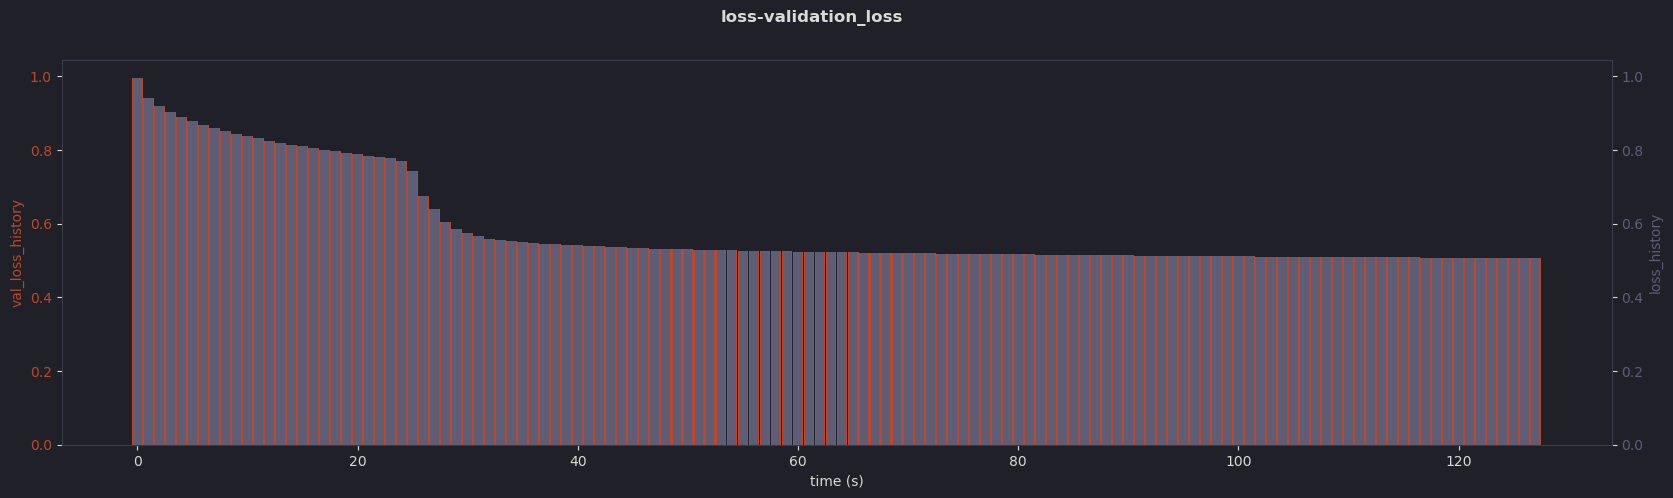

128


 14%|█▍        | 1/7 [00:00<00:00,  6.08it/s]/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]


 29%|██▊       | 2/7 [00:02<00:08,  1.73s/it]

In [ ]:
# update the train info dict with current date and time for start of training, this is done once so all training in this set has the same date
train_info_dict.update({"train_start_time":time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())})

for read_path in read_paths:
    for all_train_cols in all_train_cols_list: 
        train_cols=get_existing_subasset_train_cols(all_train_cols,read_path,train_data_info,time_column) #GET ONLY COLUMNS THAT ACTUALLY EXIST!
        use_cols=train_cols+[time_column] 
        
        #bottleneck=8
        #wideneck=len(train_cols)   # THESE NOW COME FROM THE train_info_dict 
        
        #DEFINE SCALER TYPE
        scaler=MinMaxScaler() 
        scaler=StandardScaler()
        scaler_type=scaler.__class__.__name__
        
        
        # get a dataframe for the calculation of the scaler
        train_df=read_spesific_files(read_path,start_end_df=train_data_info,use_cols=use_cols,time_column=time_column)
        
        #prepare all process data for scaler
        if type(train_info_dict["rolling_window_time"])==str:  # if rolling window time exists, is not "None"
            train_df.index=train_df[time_column]
            train_cols_func_dict={column:[train_info_dict["rolling_window_func"]] for column in train_cols}   
            train_df.loc[:,train_cols]=train_df[train_cols].rolling(train_info_dict["rolling_window_time"]).agg(train_cols_func_dict)
        if type(train_info_dict["sample_time"])==str:  # if sample_time exists, is not "None"
            numeric_cols = list(train_df.select_dtypes(include=np.number).columns)
            object_cols = list(train_df.select_dtypes(include=np.object_).columns)
            numeric_cols_func_dict={column:[train_info_dict["sample_time_func"]] for column in numeric_cols}
            object_cols_fync_dict={column:["sum"] for column in object_cols}
            cols_func_dict={**numeric_cols_func_dict,**object_cols_fync_dict}
        
            train_df.set_index(train_info_dict["time_column"],inplace=True)
            train_df=train_df.resample(train_info_dict["sample_time"]).agg(cols_func_dict)
            
        scaler.fit(train_df[train_cols])
        
        del train_df   # Free up memory

        
        # create an input shape that will fit all the models
        generic_input_shape=(None,train_info_dict["window_size"],len(train_cols))
        
        # CONFIGURE THE MODEL
        model,model_input_shape,author,layers_type=AutoEncoder(generic_input_shape,loss_type=train_info_dict["loss_type"],dropout_rate=train_info_dict["dropout_rate"],learning_rate=train_info_dict["learning_rate"])

        #update the training info dictionary
        train_info_dict.update({"train_cols":train_cols,
                            "use_cols":use_cols,
                            "scaler_type":scaler_type,
                            "total_process_num":len(train_data_info),
                            "model":model,
                            "model_input_shape_len":len(model_input_shape),
                            "scaler":scaler,
                            "column_num":len(train_cols),
                            "read_path":read_path,
                            "author":author,
                            "layers_type":layers_type    
       })
        
        # TRAIN THE MODEL
        train_info_dict,loss_history,val_loss_history,all_loss=train_model_generic_on_batches(train_info_dict)
        
        # UPDATE THE DICTINARY WITH THE RESULTS
        train_info_dict.update({
                            "loss_history":loss_history,
                            "val_loss_history":val_loss_history,
                            "all_loss":all_loss,
                            "epoch_num":len(loss_history),
                            "date_of_save":str(pd.to_datetime(datetime.now()).round(freq='S')),
                            "last_train_loss":loss_history[-1]
                           })
        
        #SAVE THE MODEL AND THE PARAMETERS TO tools_path_prefix
        train_info_dict, cust_features_dict=save_model_with_info(train_info_dict)
        
        # SAVE THE INFO TABLE -> a list which has the info of all of the trained models (to be able to find it later)
        model_info_df=save_all_models_info_totable(train_info_dict["save_model_info_table_path"],train_info_dict,cust_features_dict)
        
        #SAVE THE MODEL (NEEDE TO USE FOR LIVE)
        model_info_df.to_parquet(train_info_dict["tools_path"]+"model_info_df.parquet")

In [ ]:
# GERISI COP!

In [ ]:
# THE REST IF TO TRAIN A MODEL WITH DIFFERENT PARAMETERS

In [ ]:
for read_path in read_paths:
    for i in range(len(train_data_info)):
        use_cols=train_cols+[time_column]
        train_df=read_spesific_files(read_path,start_end_df=train_data_info.iloc[i:i+1],use_cols=use_cols,time_column=time_column)
        if len(train_df)!=0:
            train_df.index=train_df[time_column]
            plt.title(train_df[time_column].iloc[0])
            plt.plot(train_df[train_cols])
            plt.show()

In [ ]:
train_data_info.iloc[37:]

In [ ]:
all_train_cols_list=[["m_rms","mr"]]

In [ ]:
train_df=train_df.resample("10S").mean()

In [ ]:
for read_path in read_paths:
    for all_train_cols in all_train_cols_list: 
        
        for i in range(len(train_data_info)):
            train_cols=all_train_cols
            use_cols=train_cols+[time_column]
            
            train_df=read_spesific_files(read_path,start_end_df=train_data_info.iloc[i:i+1],use_cols=use_cols,time_column=time_column)
            train_df.index=train_df[time_column]
            train_df=train_df.resample("1S").mean()
            train_df["m_rms"].plot()
            plt.show()
            train_df["mr"].plot()
            plt.show()
            train_df=train_df.resample("10S").mean()
            train_df["m_rms"].plot()
            plt.show()
            train_df["mr"].plot()
            plt.show()
            train_df=train_df.resample("1min").mean()
            train_df["m_rms"].plot()
            plt.show()
            train_df["mr"].plot()
            plt.show()
            
            

In [ ]:
test_df_segment_num=1
for_train=False

In [ ]:
col_plot="m_rms"

In [ ]:
for j in range(len(train_info_dict["train_data_info"])):
    train_info_dict.update({"for_train":False,"test_df_segment_num":test_df_segment_num,"test_data_info":train_data_info})
    anomaly_dfs=[]
    
    test_df=read_spesific_files(train_info_dict["read_path"],start_end_df=train_info_dict["train_data_info"].iloc[j:j+1],use_cols=train_info_dict["use_cols"],time_column=train_info_dict["time_column"])
    if train_info_dict["rolling_window_time"]!=None:
        try:
            test_df.index=test_df[time_column]
            test_df.loc[:,train_cols]=test_df[train_cols].rolling(rolling_window_time).mean()
            test_df.reset_index(drop=True,inplace=True)
        except:
            None
    test_df_segment_step=int(len(test_df)/test_df_segment_num)
    for df_segment_order in range(test_df_segment_num):
        test_df_segment=test_df.iloc[df_segment_order*test_df_segment_step:(df_segment_order+1)*test_df_segment_step]
        if len(test_df)>0:
            X_test,X_test_list,sequence_df_list,divide_idx_list=get_data(test_df_segment,train_info_dict)
            anomaly_df=get_monolithic_anomaly_df(X_list=X_test_list,sequence_df_list=sequence_df_list,train_info_dict=train_info_dict)
            
            anomaly_df["cycle_num"]=int(train_data_info["cycle_num"].iloc[j])
            anomaly_df["year"]=train_data_info["year"].iloc[j]
            anomaly_dfs.append(anomaly_df)
    if len(anomaly_dfs)>0:
        anomaly_df=pd.concat(anomaly_dfs)
    
    plt.title(int(train_data_info["cycle_num"].iloc[j]))
    anomaly_df[col_plot].plot()
    anomaly_df[col_plot+"_ae_reconstructed"].plot()
    anomaly_df[col_plot+"_ae_mse"].plot()
    
    plt.show()


In [ ]:
all_models_info_table_column_names=['cust', 'country', 'location', 'asset', 'subasset', 'device_type', 'ID',
       'window_size', 'sample_time', 'bottleneck', 'wideneck', 'scaler_type',
       'column_num', 'epoch_num', 'total_cycles_num', 'date_of_save',
       'train_data_note', 'tools_path', 'model_name', 'scaler_name']

In [ ]:
pd.DataFrame(columns=all_models_info_table_column_names).to_parquet("all_models_info_table.parquet")

In [ ]:
['cust', 'country', 'location', 'asset', 'subasset', 'device_type', 'ID',
       'window_size', 'sample_time', 'bottleneck', 'wideneck', 'scaler_type',
       'column_num', 'epoch_num', 'total_cycles_num', 'date_of_save',
       'train_data_note', 'tools_path', 'model_name', 'scaler_name']

In [ ]:
df=pd.DataFrame()

In [ ]:
df["start"]=pd.date_range("2023-04-04","2023-04-24",freq="D")

In [ ]:
df["end"]=pd.date_range("2023-04-05","2023-04-25",freq="D")

In [ ]:
df["project"]="no_project"

In [ ]:
df["cycle_num"]=range(1,22)

In [ ]:
df[["error_rate_total","error_rate_quality_gate_1","error_rate_quality_gate_2"]]=None

In [ ]:
df["year"]=2023

In [ ]:
train_data_info=df.copy(deep=True)

In [ ]:
train_data_info

In [ ]:
train_data_info.to_parquet("use_cycles_celik-halat.parquet")

In [ ]:
k=pd.read_parquet("s3://tm-partitioned/preprocessed/celik-halat/tr/kartepe/m432/sanziman-ana/xdk/19-07578/2023/04/05/Partitioning-all-23-2023-04-05-23-52-43-98ee7a71-50cf-39d0-b3ed-765428c377fe.parquet")

In [ ]:
l=pd.read_parquet("s3://tm-partitioned/preprocessed/celik-halat/tr/kartepe/m432/sanziman-ana/xdk/19-07578/2023/04/04/Partitioning-all-23-2023-04-04-23-52-27-cd53b4ad-a181-35a1-9696-6491e9145508.parquet")

In [ ]:
def create_model_and_scaler_name(train_info_dict):
    cust_features_dict=get_cust_features(train_info_dict["read_path"])
    train_info_dict.update(cust_features_dict)
    if type(cust_features_dict)==dict:
        
        train_features_dict={key: train_info_dict[key] for key in train_info_dict["model_name_content_inorder"]}
        scaler_name="_".join([str(train_feature) for train_feature in train_features_dict.values() ])+"_scaler"+".gz"
        model_name="_".join([str(train_feature) for train_feature in train_features_dict.values() ])+"_model"+".h5"
        
        train_info_dict.update({"model_name":model_name,"scaler_name":scaler_name})
                    
        return train_info_dict,cust_features_dict

In [ ]:
cust_features_dict["cust"],cust_features_dict["country"],cust_features_dict["location"],cust_features_dict["asset"],cust_features_dict["subasset"],

In [ ]:
train_info_dict,cust_features_dict=create_model_and_scaler_name(train_info_dict)

In [ ]:
list(cust_features_dict.values())

In [ ]:
train_info_dict["model_name"]